# Getting started with pandas

Bare bones lesson on getting comfortable with pandas. This is designed to highlight some of the primary differences and advantages between pandas and some other tools like SQL, but to also provide a preview of the package so novices can have a better understanding of when they might want to use it within their work.

This is a secondary companion piece to the larger rant about pandas as a language, also stored in this repo.

## Imports

We always have to start with the import statements even though they're the last thing that makes sense.

The following are the primary canonical way of importing things for these purposes, and often these are the bare minimum for pandas to work.

You'll note that each of these tools are being imported with specific aliases, and the ones I'm using here are pretty standard in the community.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

So here we're going to go ahead and define our path to the data file. We'll be reusing the pettigrew data that we saw in our sql lesson, so we can do a nicely creative little relative path back to that other folder.  The `..` means that we want it to look up one level in the directory, then it'll start drilling down as we've asked for it.

In [2]:
datafilepath = 'pettigrew-clean.csv'

Once we have our path, we can pass that string to the `read_csv()` function from pandas. This can replace the need to use the csv module, and will load the resulting data into a pandas dataframe.  Because I've imported pandas as `pd`, I need to say `pd.` before all functions that I call from that library.  Meanwhile, this function will return back a dataframe object that we will need to save into memory.  The variable name usually used for this is `df` (dataframe, you see it right?)

In [3]:
df = pd.read_csv(datafilepath)

When you are working in Jupypter Notebooks there are two ways to look at the contents of a dataframe.  You can use `print()` like you normally would, but it isn't a very pretty output.  Just text, which isn't very fun.  Instead, you can evaluate just the name of the dataframe variable, and the nice styling of Jupyter will take over.

Take a second look at this output.  There are several important things that you should notice.

* the left side has an unlabeled left side that's bolded.  This is the index row that pandas has added on.  We can change that later.
* the top row of data has automatically been interpreted as column names, and these look different from out rows of data.
* the original order of our data has been preserved.
* in the middle of this table, we can see that it skips the middle and it showing us now just the beginning and the end our data table.
* at the very end of the table it shows us how many rows and columns there are in our table.

Compared to how we were working with our data before, we can see a really important concept about this data structure: it both holds our data and carries with it very data centric metadata.  For example, instead of having a separate list strings that we know correspond to our column headers, the data frame carries that information inside itself.

In [4]:
df

BoxNumber  FolderNumber  \
0            1             1   
1            1             2   
2            1             3   
3            1             4   
4            1             5   
5            1             6   
6            1             7   
7            1             8   
8            1             9   
9            1            10   
10           1            11   
11           1            12   
12           1            13   
13           1            14   
14           1            15   
15           1            16   
16           1            17   
17           1            18   
18           1            19   
19           1            20   
20           1            21   
21           1            22   
22           1            23   
23           1            24   
24           1            25   
25           1            26   
26           1            27   
27           1            28   
28           1            29   
29           1            30   
..         ...           ...   
580         12           581   
581         12           582   
582         12           583   
583         12           584   
584         12           585   
585         12           586   
586         12           587   
587         12           588   
588         12           589   
589         12           590   
590         13           591   
591         13           592   
592         13           593   
593         13           594   
594         13           595   
595         13           596   
596         13           597   
597         13           598   
598         13           599   
599         13           600   
600         13           601   
601         13           602   
602         13           603   
603         13           604   
604         13           605   
605         13           606   
606         13           607   
607         13           608   
608         13           609   
609         13           610   

                                              Contents             Date  
0      [Provenance documents and biographical sources]             n.d.  
1      [Provenance documents and biographical sources]             n.d.  
2      [Provenance documents and biographical sources]             n.d.  
3    Aberdeen, George Hamilton-Gordon, 4th Earl of,...         1846 Aug  
4    Abingdon, Montagu Bertie, 6th Earl of, 1808-18...       1859, 1860  
5    Acland, Sir Thomas Dyke, bart., 1787-1871. ALS...             n.d.  
6    Aikin, Arthur, 1773-1854. 3 ALS to T. J. Petti...          1823-30  
7    Ailesbury, George William Frederick Brudnell-B...          1858-59  
8    Ainslie, Sir Whitelaw, 1767-1837. 1 ALS and 2 ...         1828 Jun  
9    Ainsworth, William Francis, 1807-1896. 5 ALS t...          1843-56  
10   Ainsworth, William Harrison, 1805-1882. 5 ALS ...          1854-60  
11   Akerman, John Yonge, 1806-1873. 9 ALS and 2 LS...          1849-56  
12   Albemarle, Charlotte (Hunloke) Keppel, Countes...       1822 Mar 8  
13   Albemarle, George Thomas Keppel, 6th Earl of, ...     1857 Jul-Aug  
14   Alcock, Thomas, 1784-1833. 3 AL to T. J. Petti...          1830-33  
15   Amyot, Thomas, 1775-1850. 6 ALS to T. J. Petti...   1827 and later  
16   Anderson, Joseph, 1789-1877. 3 ALS to T. J. Pe...          1843-47  
17   Anglo-Biblical Institute. ALS (signed W. H. Cl...      1859 Nov 28  
18   Arran, Mary (Tyrrell), Countess, 1767?-1832. A...  [1824 or later]  
19   Arundale, Francis, 1807-1853. ALS to T. J. Pet...             n.d.  
20   Arundell, Henry Benedict Arundell, 11th Baron,...     1852 Jun-Sep  
21   Arundell, John Francis Arundell, 12th Baron, 1...         1860 Mar  
22   Ashburton, Alexander Baring, 1st Baron, 1774-1...  [1839 or later]  
23   Ashburton, William Bingham Baring, 2d Baron, 1...             n.d.  
24   Ashpitel, Arthur, 1807-1869. 3 ALS to T. J. Pe...         1850 Aug  
25   Auckland, George Eden, 1st Earl of, 1784-1849....       1828 Dec 7  
26   Auckland, Robert 

Now that we have a data frame, we can ask for some of this metadata.  Important to note here is that, in Python, there is a distinction between asking an object to execute a method (roughly, a function that lives inside an object that's in your program) and asking for an object's attribute values.  Sometimes objects will have special methods for getting this data out, and other times it's directly accessible.  This all depends on what you are working with, thus you will be dependent on tutorials, documentation, or the source code to tell you what is available.  Sometimes there are nice introspection things available.  Anyhow.

Presuming that you're looking at something that is tacked onto the end of a variable or other data object (so basically not just a thing hanging out on its own).  So you have something like:

`object.doodad` or `object.pizza()`

* it's a method call if there are `()` on the end
* it's an attribute access if there's *no* parens

So which one is which?

`object.doodad` is an attribute access thing and `object.pizza()` is calling the `pizza()` method of `object`.  Of course, this all presumes that this object in question knows what to do with those things

Let's get back to pandas.

There are a series of metadata attributes about a dataframe that you can access to get some information out from it.  The most amount of information that we can get out in one go is by use of the `info()` method for the data frame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
BoxNumber       610 non-null int64
FolderNumber    610 non-null int64
Contents        610 non-null object
Date            609 non-null object
dtypes: int64(2), object(2)
memory usage: 19.1+ KB


There's a lot of information here: telling us how many entries there are (601) in our dataset, corresponding to the number of rows.  Note that the default index starts at 0, so the top number is 600.  This also tell us how many columns there are (4), their names, how many values each has, and the data type stored in that column. 

We're going to return back to this after we discuss a few more things.

Meanwhile, you can ask for some of these metadata items more specifically and in ways that will give the information back to you in a computable way.

In [6]:
print(df.shape)

(610, 4)


This gives us the shape of our data frame as a tuple (so we can compute on this if we need), with the rows the first number and the columns the second number in there.

In [7]:
print(df.columns)

Index(['BoxNumber', 'FolderNumber', 'Contents', 'Date'], dtype='object')


This gives you, roughly, the names of the columns in your dataframe.  I say roughly because from a content perspective, that's true, but this is a special object.  This gives us a good transition to talking about data types and friends in dataframes.

This isn't just a list of strings. This is an `Index` object, that, yes, will roughly look and stink like a list, but exists with special metadata.  See that bit at the end?  It says `object`. We're going to talk about what that specifically means in a minute, but we first need to talk about what it means for a collection-like object to have a data type.  So this is an `Index` type object, and we can look at that clearly.

In [8]:
print(type(df.columns))

<class 'pandas.core.indexes.base.Index'>


But there's also the data type of the contents.  This is actually a pretty normal concept for other programming languages, but completely abnormal if you only know Python.  What pandas generally requires is that every 1D (one dimensional) object have the same data type.  For example, such and such collection is all floating numbers, while so and so collection is all strings.  This is because there are nice fancy things that you can do on some of these special kinds of collections.

The most permissive data type is the `object` time, which allows you to have just a pile of whatever.  In our case, we've got a bunch of strings.

The other data types are two different kinds of numbers and there's a special type just for dates.

We're going to see this sort of thing in a few more places as we move forward.

We can see that each of our columns have their own data type as well, and we can use another attribute to see that information.

In [9]:
print(df.dtypes)

BoxNumber        int64
FolderNumber     int64
Contents        object
Date            object
dtype: object


We can start to see a few more things about the data organization of the pandas data frame.  Rows and columns have different expectations. Columns are expected to have one coherent data type across all cells.  Rows can contain any combination of data types in their columns.  Dataframes, then, are collections of these columns of data, where each column contains a series of data.  Slicing data across all columns gives us rows.

This can also introduce us to the idea of the Series object. These are our primary 1D collection (like a single flat list) and represents all the ordered data in a single column.  These series objects are the ones that carry the data type with them.  

Remember our `df.info()` results?

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
BoxNumber       610 non-null int64
FolderNumber    610 non-null int64
Contents        610 non-null object
Date            609 non-null object
dtypes: int64(2), object(2)
memory usage: 19.1+ KB
None


Each of these columns listed here has information on that column as a Series and how many data points are stored within.

You'll note that it has interpreted BoxNumber as `int64` on its own. I didn't specify anything during the data import process. It will usually do a good job of this when the data points are values that can be converted over.  When the data points can't be converted into a more specific data type, the column is left as an `object` type. 

This means that viewing the `df.info()` results immediately after data import is a vital step for checking your data and preventing annoying bugs.  For example, a column that you expected to only have numbers in it may be read in as an `object` type if there were some extra characters in there.  Errors in series data types usually indicate a data cleaning problem.

# Extracting data

The syntax for extracting data from a data frame is where things in pandas really start to diverge from normal python.  There are also a variety of extraction approaches and syntaxes that you can use, some with their own benefits and draw backs.  But most roughly equivalent.  You'll find your own style as you move forward.  I will leave you with the following suggestions in this area.

Once you're reasonably comfortable working within pandas, pick your own consistent style for extraction.  You may choose one that makes the most sense to you, but you may also choose to match the canonical style of your team mates.  Keeping this consistent will make your code more predictable and readable as you move forward.

Use a cheat sheet and reference it all the time.  There are a lot of items that are inconsistent with normal Python, and there's a lot to learn right at once.  So don't be afraid to constantly check you cheat sheet.  I also suggest that you print it out and write on it as you are learning.  Even consider printing it such that the back of the paper is blank so you can write down your own examples or reword things to make more sense.  There are many cheat sheets out there, but there are several good ones here:  https://www.datacamp.com/community/blog/python-pandas-cheat-sheet

I'm going to showcase a few.

## Asking for a column by name

Working much like a dictionary would, you can ask for a column's data by name.  You'll use square brackets and place the string value of the column name inside.  Note that it must match verbatim.  Note that what I get back here is much more than a list of data. This is a pandas series object (which we can confirm via `type()`).  You'll see that our index numbers stay with the data (on the left) and our actual data points are on the right.  In this way, we are able to extract out some of our data, but much of the context of that data remains with it.

In [11]:
df['BoxNumber']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
580    12
581    12
582    12
583    12
584    12
585    12
586    12
587    12
588    12
589    12
590    13
591    13
592    13
593    13
594    13
595    13
596    13
597    13
598    13
599    13
600    13
601    13
602    13
603    13
604    13
605    13
606    13
607    13
608    13
609    13
Name: BoxNumber, Length: 610, dtype: int64

In [12]:
print(type(df['BoxNumber']))

<class 'pandas.core.series.Series'>


That was very straight forward, but asking for multiple columns by name adds some complication. All the names that you want need to be in a single regular Python list.  You pass this list into the df[] call.  Each column name needs to be an element in the list, and like before they all need to be verbatim match strings.

This syntax is obnoxious at first, but valuable later because you can ask for more things within the data extraction syntax.  Keeping all the column names together makes things easier as you go.

Because you are getting back more than one column, what is returned to you is a new data frame.  You can choose to save it under a variable name if you'd like, but don't reuse `df` unless you want to delete your original data!

In [13]:
df[['BoxNumber', 'FolderNumber']]

BoxNumber  FolderNumber
0            1             1
1            1             2
2            1             3
3            1             4
4            1             5
5            1             6
6            1             7
7            1             8
8            1             9
9            1            10
10           1            11
11           1            12
12           1            13
13           1            14
14           1            15
15           1            16
16           1            17
17           1            18
18           1            19
19           1            20
20           1            21
21           1            22
22           1            23
23           1            24
24           1            25
25           1            26
26           1            27
27           1            28
28           1            29
29           1            30
..         ...           ...
580         12           581
581         12           582
582         12           583
583         12           584
584         12           585
585         12           586
586         12           587
587         12           588
588         12           589
589         12           590
590         13           591
591         13           592
592         13           593
593         13           594
594         13           595
595         13           596
596         13           597
597         13           598
598         13           599
599         13           600
600         13           601
601         13           602
602         13           603
603         13           604
604         13           605
605         13           606
606         13           607
607         13           608
608         13           609
609         13           610

[610 rows x 2 columns]

## Extracting data from rows

This is where things get weird.  I will also reiterate my suggestion about using a cheat sheet.

Rows have index numbers, which may or may not look like numbers.  The default index is numbers, but you can change it to be different numbers, or you can use an entirely different column of data to be the index.  You can even have multiple columns as an index (multiindex is the word for your googling there).  But rows also have position numbers.

And all of these things can be used to look up rows. 

There are two main things (purposefully not using a technical word here for reasons to be explained next) to use to do this.

* If you have an row's index value:  `df.loc[label]`
    * the label value needs to match in content and data type
* If you have a row's position number:  `df.iloc[number]`

Note here, there is the use of dot notation BUT there are [] happening instead of ().  This is because this isn't a method on the dataframe.  Roughly, this is an attribute that you can slice.  Just according to very specific rules.

Again, cheat sheet.

You'll get used to it in time.

Just remember:  when using `loc` you are referring to things by their name, and sometimes those names are numbers.  But you can also use `iloc` to make pretty standard looking slicing notation work.

In [14]:
print(type(df.loc[9]))

<class 'pandas.core.series.Series'>


In [15]:
df.loc[9]

BoxNumber                                                       1
FolderNumber                                                   10
Contents        Ainsworth, William Francis, 1807-1896. 5 ALS t...
Date                                                      1843-56
Name: 9, dtype: object

Note that while we are getting contents of columns back, we are still getting a Series object of data.  The data type for these results continues to be an `object` because I have numbers and strings.  The index of these data points now correspond to the column header for each.  This means that you can look up the column value for a specific row.  I can do this by chaining the column lookup syntax just after my row extraction syntax.

In [16]:
print(df.loc[9]['FolderNumber'])

10


When using `iloc` you can also slice ranges.

In [17]:
df.iloc[30:40]

BoxNumber  FolderNumber  \
30          1            31   
31          1            32   
32          1            33   
33          1            34   
34          1            35   
35          1            36   
36          1            37   
37          1            38   
38          1            39   
39          1            40   

                                             Contents             Date  
30  Baird, [William?], 1803-1872. 2 ALS and 3 AL t...          1831-34  
31  Banks, Thomas Christopher, 1765-1854. ALS to T...      1845 Jun 30  
32  Baring, Charles, Bp. of Durham, 1807-1879. 2 A...      [1850]-1865  
33  Baring, Sir Thomas, 1772-1848. AL to Mr. Steph...      1831 Mar 24  
34   Baron, John, 1786-1851. 2 ALS to T. J. Pettigrew  [1836 or later]  
35  Barrington, William Keppel Barrington, 6th Vis...      1834 Mar 28  
36  Bateman, Thomas, 1821-1861. 4 ALS to T. J. Pet...          1850-52  
37  Bateman, William Bateman Bateman-Hanbury, 2d B...       1857, 1858  
38  Beattie, William, 1793-1875. 15 ALS to T. J. P...        1829-[36]  
39  Beaufort, Emily Frances (Smith), Duchess of, 1...      1829 Jul 31

And then further extract a column out of these results, because it is just a new dataframe.

In [18]:
df.iloc[30:40]['Date']

30            1831-34
31        1845 Jun 30
32        [1850]-1865
33        1831 Mar 24
34    [1836 or later]
35        1834 Mar 28
36            1850-52
37         1857, 1858
38          1829-[36]
39        1829 Jul 31
Name: Date, dtype: object

So we've extracted out a nice internal slice of data that we wanted, and all the while kept the context of the data with it. Well, some of it. Enough that I can reconstruct which rows this column of data came from.

## Aggregation

Aggregation will still have a strong focus on numerical values, such as sum/max/min/mean.  The syntax for these aggregations also involves a lot of chaining in our syntax.  Much like you build up a SQL query by staring from the broadest statement and adding detail, you do something similar.

Many of the calculation aggregations will expect that you have purely numeric values, and thus won't work when you have text.  But we can still count instances.

When you have a SQL aggregation query, you have two main things to identify:  which thing is the repeating group (and will receive the collapse) and which is the things to count or do math to?

We have two numeric columns, BoxNumber and FolderNumber.  BoxNumber is the one repeating, and Folder number specifies the entities inside it.

One slightly silly thing that we can do is calculate the mean folder number for each Box.  This means that Box is the grouping column and FolderNumber is our math column.

Our basic syntax is:

`df.groupby('grouping_column')['math column'].calculation()`.

Note the difference in the syntax here.  You can't really use any of these pieces independently (and this is where you may choose to use SQL if you are more comfortable with that language).

So we need to group by BoxNumber.

`df.groupby('BoxNumber')`

Then select just the folder number.

`df.groupby('BoxNumber')['FolderNumber']`

And finally say that we want the mean.

In [19]:
df.groupby('BoxNumber')['FolderNumber'].mean()

BoxNumber
1      26.0
2      77.5
3     117.5
4     164.0
5     225.5
6     274.5
7     324.5
8     371.0
9     417.0
10    472.5
11    524.0
12    570.0
13    600.5
Name: FolderNumber, dtype: float64

This is another series object, where the index values are the unique values from the grouped column, and the data values are the math results for your math column.  

You can group by multiple columns if you need.  Much like listing many columns at the same time for selection, we put the multiple column names in a list and pass that to group by.

So let's take a look at unique dates and box numbers. How many are repeating?

The order here matters.  If we start with BoxNumber, it'll show all the unique dates in there.

Because we're just counting here, each value in the other columns should be the same.  So we can leave the math column out in this case, but we're going to see repeating values across the other two columns.

In [20]:
df.groupby(['BoxNumber', 'Date']).count()

FolderNumber  Contents
BoxNumber Date                                   
1         1817 Jun 6                  1         1
          1822 Mar 8                  1         1
          1823-30                     1         1
          1826-52                     1         1
          1827 Feb 1                  1         1
          1827 and later              1         1
          1827-34                     1         1
          1828 Dec 7                  1         1
          1828 Jun                    1         1
          1829 Jul 31                 1         1
          1829 Mar 5                  1         1
          1829-[36]                   1         1
          1830-33                     1         1
          1830-38                     1         1
          1831 Apr, Jun               1         1
          1831 Mar 24                 1         1
          1831-34                     1         1
          1834 Mar 28                 1         1
          1843-47                     1         1
          1843-56                     1         1
          1845 Jun 30                 1         1
          1846 Aug                    1         1
          1849-56                     1         1
          1850 Aug                    1         1
          1850 Jan 15                 1         1
          1850-52                     1         1
          1852 Jun-Sep                1         1
          1853 Nov 10                 1         1
          1854 Jul, Oct               1         1
          1854-60                     1         1
...                                 ...       ...
12        1850 Jun 21                 1         1
          1850, 1852                  1         1
          1850-52                     1         1
          1852 Sep 6                  1         1
          1862 Mar 14                 1         1
          [1827]-29                   1         1
          [1829 or later]             1         1
          [1830]-58                   6         6
          [1838 or later]             1         1
          n.d.                        5         5
13        1816-30                     1         1
          1817 Feb 3                  1         1
          1820 Sep 1                  1         1
          1826 May 1                  1         1
          1828-35                     1         1
          1829-34                     1         1
          1832, 1840                  1         1
          1833-49                     1         1
          1836 Sep, Nov               1         1
          1840-45                     1         1
          1849 Jan 22                 1         1
          1850 Jan 19                 1         1
          1850 Jul 12                 1         1
          1851 Oct 23                 1         1
          1852 Jul 30                 1         1
          1853 Mar                    1         1
          [1836 or later]             1         1
          [1842 or later]             1         1
          [1850 or later]             1         1
          n.d.                        1         1

[557 rows x 2 columns]

But if you start with Date, it'll show all the unique box numbers each has.

In [21]:
df.groupby(['Date', 'BoxNumber']).count()

FolderNumber  Contents
Date            BoxNumber                        
1797 Jul 25     10                    1         1
1800-18         2                     1         1
1804 Mar 23     2                     1         1
1804-27         5                     1         1
1805-42         5                     1         1
1811 May 9      9                     1         1
1813 Dec 8      6                     1         1
1814, 1823      4                     1         1
1815, 1821      5                     1         1
1815-18         5                     1         1
1815-33         11                    1         1
1815-38         4                     1         1
1816 Jan 5      9                     1         1
1816 Oct 8      3                     1         1
1816, 1825      10                    1         1
1816-17         8                     1         1
1816-23         4                     1         1
1816-30         13                    1         1
1816-43         12                    1         1
1817 Feb 3      13                    1         1
1817 Jan 16     11                    1         1
1817 Jun        5                     1         1
1817 Jun 6      1                     1         1
1817 Mar 13     7                     1         1
1817 Mar 21     5                     1         1
1817 Nov 22     7                     1         1
1817-26         12                    1         1
1817-38         6                     1         1
1818 Jan 9      6                     1         1
1818, 1828      5                     1         1
...                                 ...       ...
[1850 or later] 13                    1         1
[1850], 1861    5                     1         1
[1850]-1865     1                     1         1
[1853 or later] 4                     1         1
[1856]-59       4                     1         1
[1856]-60       5                     1         1
[1857-62]       2                     1         1
[1859 or later] 4                     2         2
                8                     1         1
[1860 or later] 9                     1         1
[1860?] Jul 24  3                     1         1
[after 1831]    7                     1         1
[after 1834]    4                     1         1
[before 1835]   2                     1         1
[ca. 1849]      4                     1         1
[n.d.]          11                    1         1
n.d             4                     1         1
n.d.            1                     7         7
                2                     5         5
                3                     2         2
                4                     5         5
                5                     7         7
                6                     2         2
                7                     5         5
                8                     1         1
                9                     6         6
                10                    6         6
                11                    2         2
                12                    5         5
                13                    1         1

[557 rows x 2 columns]

Because this is a series, we can ask for things by name.  For example, if we wanted to only see the results for the `'n.d.'` row, we can do that.  Remember that this is a dataframe and we want to look up a data via the index value.  So we need to use .loc

In [22]:
df.groupby(['Date', 'BoxNumber']).count().loc['n.d.']

FolderNumber  Contents
BoxNumber                        
1                     7         7
2                     5         5
3                     2         2
4                     5         5
5                     7         7
6                     2         2
7                     5         5
8                     1         1
9                     6         6
10                    6         6
11                    2         2
12                    5         5
13                    1         1

This is also an example of the multi index.  So these rows are uniquely identified by both the date and the box number.  We can add the second value into our loc via a comma.

In [23]:
df.groupby(['Date', 'BoxNumber']).count().loc['n.d.',2]

FolderNumber    5
Contents        5
Name: (n.d., 2), dtype: int64

When we have a single column of data coming back to us, we can do additional math on those groupings. By omitting the column extraction entirely, we can have this calculation run on all the columns and get those results back.  In this case, all numbers should be about the same so long as each column has no missing data that's different from the others.  We can take a look at the date column. Before we do the calculation, we can see that there appears to be a missing date for one of the letters within box 2.

In [24]:
df.groupby('BoxNumber').count()

FolderNumber  Contents  Date
BoxNumber                              
1                    51        51    51
2                    52        52    51
3                    28        28    28
4                    65        65    65
5                    58        58    58
6                    40        40    40
7                    60        60    60
8                    33        33    33
9                    59        59    59
10                   52        52    52
11                   51        51    51
12                   41        41    41
13                   20        20    20

In [25]:
df.groupby('BoxNumber').count().mean()

FolderNumber    46.923077
Contents        46.923077
Date            46.846154
dtype: float64

When we add mean onto the end of this, it runs the calculation down each column of data that isn't acting as the index.  This tells us the mean number of folders within each box.  Only the date column has a difference in the values because of that missing data point.  This means that while the column name doesn't entirely matter if you are just counting instances, it does matter if that column has data in there or not.

There are other ways to count things, but this gives you a taste for how you can build up these queries.

What's even cooler is that there is some basic visualization built in without a lot of work. These won't give you the most amazing customized plots, but it is easy enough to do that it can be really helpful as you're exploring data.  There are other viz packages that you might want to use later.

In the case of our graphic below, we are plotting the counts of our index values.  So that means it's showing how many folders are in each box.  A line graph really isn't the best for this, so we can change it to a bar plot with a small attribute statement in the plot method.

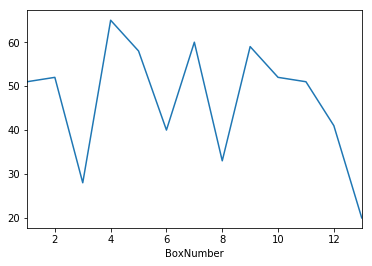

In [26]:
df.groupby('BoxNumber')['FolderNumber'].count().plot()

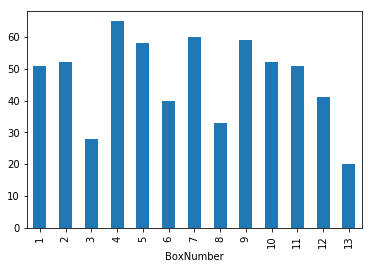

In [27]:
df.groupby('BoxNumber')['FolderNumber'].count().plot(kind='bar')

An equivalent query to perform the mean calculation in SQL would require that you do a subquery on the column of numbers. In the pandas world, you can keep chaining values on to the end.  This works the best with getting one value out at a time, and there are other ways to grab multiple results out of a complex query.

Pandas retains the same value of clear, documented, in memory data manipulation. Our base data file has only been read in, and all our manipulations have happened in just the variable held in memory in python.  

The resulting data frame can also be written out to disk quite easily.  Let's go back to our previous example where we were counting the dates across box numbers and write that out to a csv.

We'll go ahead and ask for the FolderNumber column, since we know that is a unique value without anything missing.

In [28]:
df.groupby(['Date', 'BoxNumber'])['FolderNumber'].count()

Date             BoxNumber
1797 Jul 25      10           1
1800-18          2            1
1804 Mar 23      2            1
1804-27          5            1
1805-42          5            1
1811 May 9       9            1
1813 Dec 8       6            1
1814, 1823       4            1
1815, 1821       5            1
1815-18          5            1
1815-33          11           1
1815-38          4            1
1816 Jan 5       9            1
1816 Oct 8       3            1
1816, 1825       10           1
1816-17          8            1
1816-23          4            1
1816-30          13           1
1816-43          12           1
1817 Feb 3       13           1
1817 Jan 16      11           1
1817 Jun         5            1
1817 Jun 6       1            1
1817 Mar 13      7            1
1817 Mar 21      5            1
1817 Nov 22      7            1
1817-26          12           1
1817-38          6            1
1818 Jan 9       6            1
1818, 1828       5            1
             

The way that we write out a csv is a method that can be called off of a dataframe directly.

In [29]:
df.groupby(['Date', 'BoxNumber'])['FolderNumber'].count().to_csv('dateboxcount.csv')

You should hopefully see that pandas is taking care of all the IO again for writing out the file, with you only needing to specify the file name.  This method has many options and ways to control what goes out, but much of the default is what you will normally want.

## In sum

Pandas is a powerful tool used quite broadly across data fields. It is optimized for working with data, providing one liners and very short patterns for many of the very common data activities.  There are many functions for reading in a variety of data formats that are not always directly supported, or cleanly supported in core python.  Many people will use pandas solely for those IO tasks.

The syntax of pandas can also be more adaptable for more complex calculations, but still with a pretty high learning curve, the same as any other query language.

Pandas is also documented reasonably well, with it being very commonly used across Python users.  However, some documentation may be old and promoting outdated styles or deprecated tools. You must look at dates for those help pages and stay savvy.